# HW 1 MUSA 650

**Lu Yii Wong & Yujin Song**

31 Jan 2025

## 1 Data Exploration

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()


### 1.1 Dimensionality
- In this case, both the training and test data sets are arrays of multidimensional objects.
- There are a total of The length of the training data set is 60,000, while the test data set is 10,000. There is a total of 784 features per sample in this data set. Based on the shape of the data, we understand that it is a 3D array.
- If an array has a shape of `(100, 28, 28)`, the first number represents the number of images/samples, while the seecond and third numbers represent the height and width of the image in pixels. If the 3D array is flattened into a 2D array, it would look like this `(100, 784)`. 
- `flatten()` can be used to convert a multidimensional array into 1D. Then, use `reshape()` to convert the 1D array into a 2D array (example is shown below).
- It is necessary to reshape raw images into 1D arrays as it will reduce the amount of memory it takes for processing in the model. This is especially important when we are processing large datasets or running large, complicated models like neural networks. By reducing the amount of memeory needed, we'd save a lot of time in processing [source](https://www.geeksforgeeks.org/impact-of-image-flattening/). 

In [6]:
# Identifying the type of data
print(type(x_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# Print length and shape of training set
print("Training data set length:", len(x_train))
print("Training data shape:", x_train.shape)

# Print length and shape of testing set
print("Testing data set length:", len(x_test))
print("Testing data shape:", x_test.shape)

Training data set length: 60000
Training data shape: (60000, 28, 28)
Testing data set length: 10000
Testing data shape: (10000, 28, 28)


In [8]:
# Multiple width by height for number of total features (28x28)
num_features = x_train.shape[1] * x_train.shape[2]
print("Number of features per sample:", num_features)

Number of features per sample: 784


In [9]:
# Example 3D array (10x28x28) because x_train is too big
arr_3d = np.arange(7840).reshape(10, 28, 28)
print("Original 3D array shape:", arr_3d.shape)

# Flatten to 1D
arr_flat = arr_3d.flatten()
print("Flattened shape:", arr_flat.shape) 

# Reshape into 2D (280 rows by 28 columns)
arr_2d = arr_flat.reshape(280, 28)
print("Reshaped 2D array shape:", arr_2d.shape)

Original 3D array shape: (10, 28, 28)
Flattened shape: (7840,)
Reshaped 2D array shape: (280, 28)


### 1.2 Visualization

In [ ]:
# Find one random example for each digit (0-9)
unique_classes = np.unique(y_test)  # Digits 0-9
selected_images = []
selected_labels = []

for digit in unique_classes:
    indices = np.where(y_test == digit)[0]  # Get indices where label == digit
    random_index = np.random.choice(indices)  # Randomly select one index
    selected_images.append(x_test[random_index])  # Store the image
    selected_labels.append(digit)  # Store the corresponding label

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # 2 rows, 5 columns
axes = axes.ravel()  # Flatten for easy iteration

for i in range(10):
    axes[i].imshow(selected_images[i], cmap='gray')  # Display image
    axes[i].set_title(f"Digit: {selected_labels[i]}")  # Set label
    axes[i].axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [13]:
# Looking at the number of categories there are in the MINST dataset (Shows 0-9)
unique_classes = np.unique(y_test)
print(unique_classes)

# Create empty list for the images and their corresponding labels
selected_images = []
selected_labels = []


[0 1 2 3 4 5 6 7 8 9]


In [14]:
# Select one random example from each category
for digit in unique_classes:
    indices = np.where(y_test == digit)[0]  # Get indices where label == digit
    random_index = np.random.choice(indices)  # Randomly select one index
    selected_images.append(x_test[random_index])  # Store the image
    selected_labels.append(digit)  # Store the corresponding label

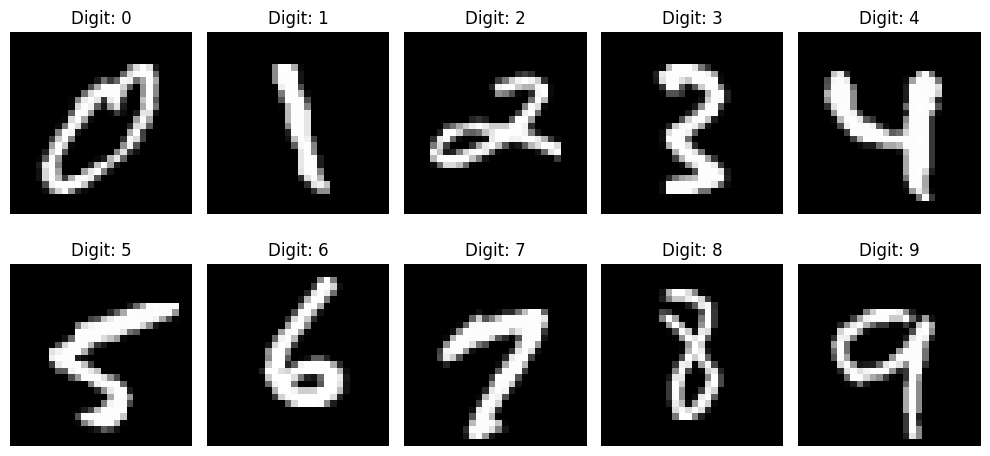

In [15]:
# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5)) 
axes = axes.ravel() 

for i in range(10):
    axes[i].imshow(selected_images[i], cmap='gray')  # Display image
    axes[i].set_title(f"Digit: {selected_labels[i]}")  # Set label
    axes[i].axis('off')  # Hide axes

plt.tight_layout()
plt.show()

## 2 Data Processing

### 2.1 Subsetting

After creating the 10% random subset for training and testing sets, the distribution of the both the initial and reduced train data are very similar.

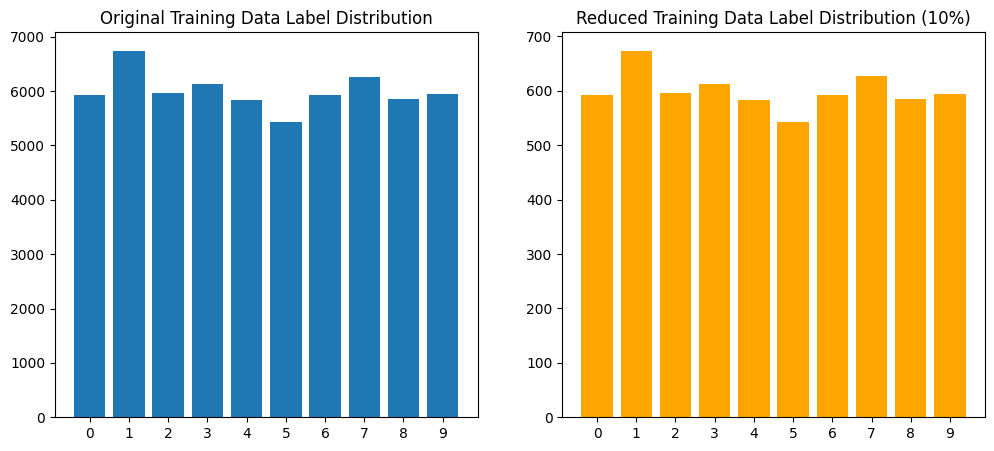

In [42]:
from sklearn.model_selection import train_test_split

# Create 10% subsets train subset
x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=42, stratify=y_train)
# Create 10% subsets test subset
x_test_subset, _, y_test_subset, _ = train_test_split(x_test, y_test, test_size=0.9, random_state=42, stratify=y_test)

# Convert labels to pandas Series for better visualization
original_dist = pd.Series(y_train).value_counts().sort_index()
subset_dist = pd.Series(y_train_subset).value_counts().sort_index()

# Print distributions
#print("Original Training Data Label Distribution:\n", original_dist)
#print("\nReduced Training Data Label Distribution:\n", subset_dist)

# Visualizing distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].bar(original_dist.index, original_dist.values)
axes[0].set_title("Original Training Data Label Distribution")
axes[0].set_xticks(range(10))

# Reduced distribution
axes[1].bar(subset_dist.index, subset_dist.values, color='orange')
axes[1].set_title("Reduced Training Data Label Distribution (10%)")
axes[1].set_xticks(range(10))

plt.show()

Next, we subset the first 10% of the each training and testing sets. In this case, the distrubtion of the data is different for the initial and reduced train data. 

In [43]:
# Get the first 10% of each dataset
train_size = int(0.1 * len(x_train))  # 10% of training data
test_size = int(0.1 * len(x_test))  # 10% of testing data

x_train_subset, y_train_subset = x_train[:train_size], y_train[:train_size]
x_test_subset, y_test_subset = x_test[:test_size], y_test[:test_size]

# Check distribution of labels in original and subset datasets
original_train_dist = pd.Series(y_train).value_counts().sort_index()
subset10_train_dist = pd.Series(y_train_subset).value_counts().sort_index()

original_test_dist = pd.Series(y_test).value_counts().sort_index()
subset10_test_dist = pd.Series(y_test_subset).value_counts().sort_index()


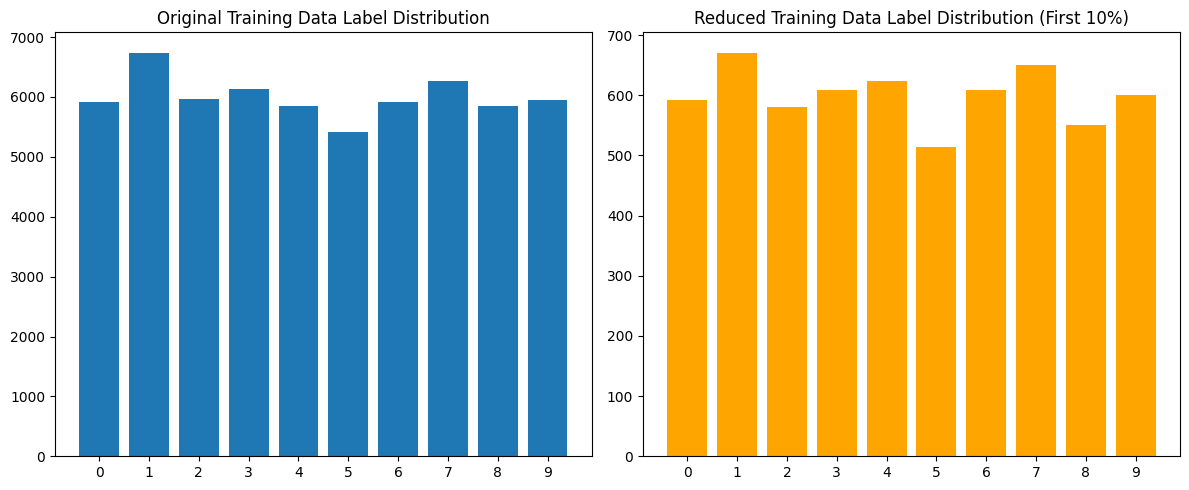

In [44]:
# Visualizing distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original train distribution
axes[0].bar(original_train_dist.index, original_train_dist.values)
axes[0].set_title("Original Training Data Label Distribution")
axes[0].set_xticks(range(10))

# Reduced train distribution
axes[1].bar(subset10_train_dist.index, subset10_train_dist.values, color='orange')
axes[1].set_title("Reduced Training Data Label Distribution (First 10%)")
axes[1].set_xticks(range(10))

plt.tight_layout()
plt.show()


When reducing the dataset size, the samples taken from selecting the first portion of the data set might be representative of the whole dataset, especially if the data is sorted by a feature. In our case, the distribution of the subsampled dataset that took only the first 10% of the training set had a distribution more different from the original dataset, compared to the randomly reduced subsampled dataset.

Overall, subsampling is beneficial when developing machine learning models because by reducing the number of samples, "biases are reduced to mitigate imbalances in the training data" ([source](https://pubs.rsc.org/en/content/articlepdf/2023/dd/d3dd00037k#:~:text=Data%20subsampling%20is%20an%20established,data%20and%20thereby%20decrease%20performance.)). Additionally, subsampling can also reduce the memory and time needed to run the model ([source](https://medium.com/@rithpansanga/choosing-the-right-size-a-look-at-the-differences-between-upsampling-and-downsampling-methods-daae83915c19#)). While reducing biases is good, it has tradeoffs as well. Subsampling can also result in the "loss of important information and can bias the model" ([source](https://medium.com/@rithpansanga/choosing-the-right-size-a-look-at-the-differences-between-upsampling-and-downsampling-methods-daae83915c19#)).

### 2.2 Feature Engineering

In this assignment, the features are the pixel values of the MNIST images, which are grayscale and have a shape of
28 × 28. Each image is represented as a 2D NumPy array where pixel intensities range from 0 (black) to 255 (white). The output (labels) represents the digit category (0-9), indicating which number is depicted in the image, and is stored as a single integer per image.

Distinguishing between features (inputs) and outputs (labels) is essential in machine learning as it defines what the model learns and predicts. Features provide the input data, while labels serve as the target for learning. Features determine how specific variables influence the model’s predictions, shaping its ability to identify patterns and make accurate classifications. ([source](https://builtin.com/data-science/feature-importance))

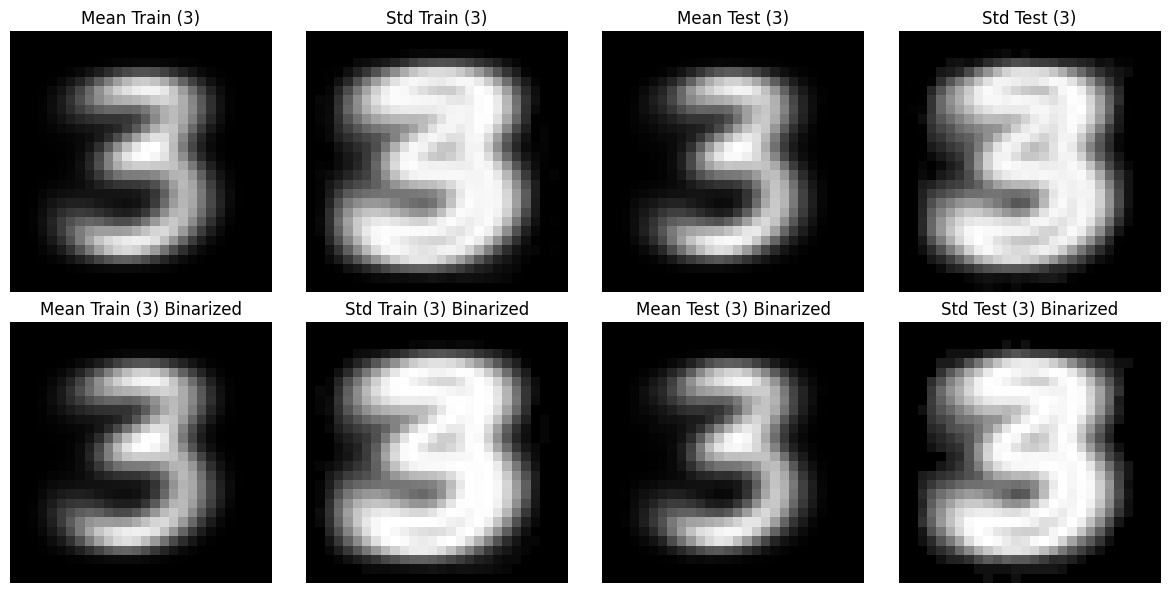

In [45]:
# Select all training images labeled "3"
train_images_3 = x_train[y_train == 3]
test_images_3 = x_test[y_test == 3]

# Compute the mean and standard deviation images for category "3" in both training and testing sets
mean_train_3 = np.mean(train_images_3, axis=0)
std_train_3 = np.std(train_images_3, axis=0)
mean_test_3 = np.mean(test_images_3, axis=0)
std_test_3 = np.std(test_images_3, axis=0)

# Binarize images: Convert pixel values to 0 or 1 (threshold at 128)
train_images_3_binary = (train_images_3 >= 128).astype(int)
test_images_3_binary = (test_images_3 >= 128).astype(int)

# Compute mean and standard deviation for binarized images
mean_train_3_bin = np.mean(train_images_3_binary, axis=0)
std_train_3_bin = np.std(train_images_3_binary, axis=0)
mean_test_3_bin = np.mean(test_images_3_binary, axis=0)
std_test_3_bin = np.std(test_images_3_binary, axis=0)

# Plot mean and standard deviation images for grayscale images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes[0, 0].imshow(mean_train_3, cmap='gray')
axes[0, 0].set_title("Mean Train (3)")
axes[0, 0].axis('off')

axes[0, 1].imshow(std_train_3, cmap='gray')
axes[0, 1].set_title("Std Train (3)")
axes[0, 1].axis('off')

axes[0, 2].imshow(mean_test_3, cmap='gray')
axes[0, 2].set_title("Mean Test (3)")
axes[0, 2].axis('off')

axes[0, 3].imshow(std_test_3, cmap='gray')
axes[0, 3].set_title("Std Test (3)")
axes[0, 3].axis('off')

# Plot mean and standard deviation images for binarized images
axes[1, 0].imshow(mean_train_3_bin, cmap='gray')
axes[1, 0].set_title("Mean Train (3) Binarized")
axes[1, 0].axis('off')

axes[1, 1].imshow(std_train_3_bin, cmap='gray')
axes[1, 1].set_title("Std Train (3) Binarized")
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_test_3_bin, cmap='gray')
axes[1, 2].set_title("Mean Test (3) Binarized")
axes[1, 2].axis('off')

axes[1, 3].imshow(std_test_3_bin, cmap='gray')
axes[1, 3].set_title("Std Test (3) Binarized")
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

The **mean images** for both the **training and testing sets** illustrate the average structure of the digit "3," with the brightest areas indicating the most consistent pixel values across different samples. The **standard deviation** images highlight regions where handwriting styles vary the most, showing larger white areas compared to the mean images. The training and testing sets appear visually similar, suggesting a well-balanced dataset.

For **the binarized images**, **the mean images** still preserve the general shape of "3," while **the standard deviation images** emphasize distinct variations along the edges, similar to those observed in the original grayscale data. The differences between the training and testing sets remain subtle, indicating a consistent dataset distribution.

The overall similarity between the training and testing distributions suggests that MNIST is well-represented, reinforcing its reliability as a benchmark dataset for machine learning tasks.

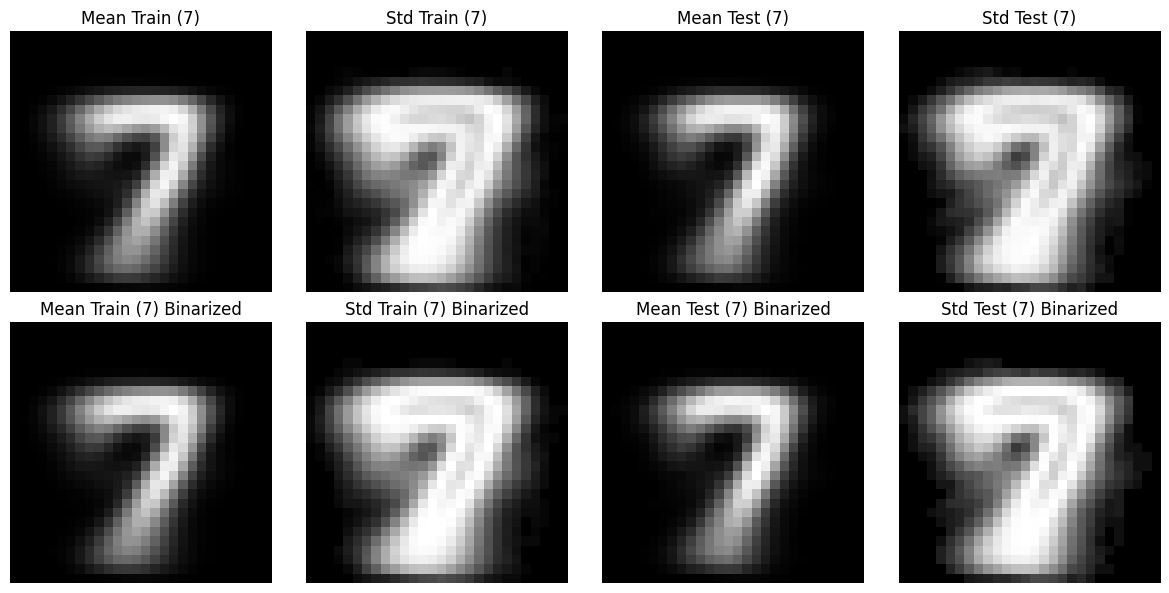

In [46]:
# Select all training and testing images labeled "7"
train_images_7 = x_train[y_train == 7]
test_images_7 = x_test[y_test == 7]

# Compute the mean and standard deviation images for category "7" in both training and testing sets
mean_train_7 = np.mean(train_images_7, axis=0)
std_train_7 = np.std(train_images_7, axis=0)
mean_test_7 = np.mean(test_images_7, axis=0)
std_test_7 = np.std(test_images_7, axis=0)

# Binarize images: Convert pixel values to 0 or 1 (threshold at 128)
train_images_7_binary = (train_images_7 >= 128).astype(int)
test_images_7_binary = (test_images_7 >= 128).astype(int)

# Compute mean and standard deviation for binarized images
mean_train_7_bin = np.mean(train_images_7_binary, axis=0)
std_train_7_bin = np.std(train_images_7_binary, axis=0)
mean_test_7_bin = np.mean(test_images_7_binary, axis=0)
std_test_7_bin = np.std(test_images_7_binary, axis=0)

# Plot mean and standard deviation images for grayscale images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

axes[0, 0].imshow(mean_train_7, cmap='gray')
axes[0, 0].set_title("Mean Train (7)")
axes[0, 0].axis('off')

axes[0, 1].imshow(std_train_7, cmap='gray')
axes[0, 1].set_title("Std Train (7)")
axes[0, 1].axis('off')

axes[0, 2].imshow(mean_test_7, cmap='gray')
axes[0, 2].set_title("Mean Test (7)")
axes[0, 2].axis('off')

axes[0, 3].imshow(std_test_7, cmap='gray')
axes[0, 3].set_title("Std Test (7)")
axes[0, 3].axis('off')

# Plot mean and standard deviation images for binarized images
axes[1, 0].imshow(mean_train_7_bin, cmap='gray')
axes[1, 0].set_title("Mean Train (7) Binarized")
axes[1, 0].axis('off')

axes[1, 1].imshow(std_train_7_bin, cmap='gray')
axes[1, 1].set_title("Std Train (7) Binarized")
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_test_7_bin, cmap='gray')
axes[1, 2].set_title("Mean Test (7) Binarized")
axes[1, 2].axis('off')

axes[1, 3].imshow(std_test_7_bin, cmap='gray')
axes[1, 3].set_title("Std Test (7) Binarized")
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

The mean images for both the training and testing sets of the digit "7" show a clear and consistent structure, similar to the results for the digit "3." However, the standard deviation images exhibit slightly more variation in the upper part of the digit, indicating greater differences in handwriting styles compared to "3." The binarized images retain the general shape of "7," and their mean and standard deviation images closely resemble those of the original grayscale data. Overall, while there are slight differences in the standard deviation images between the training and testing sets, the binarized and original images show a consistent distribution, reinforcing the stability of the MNIST dataset.

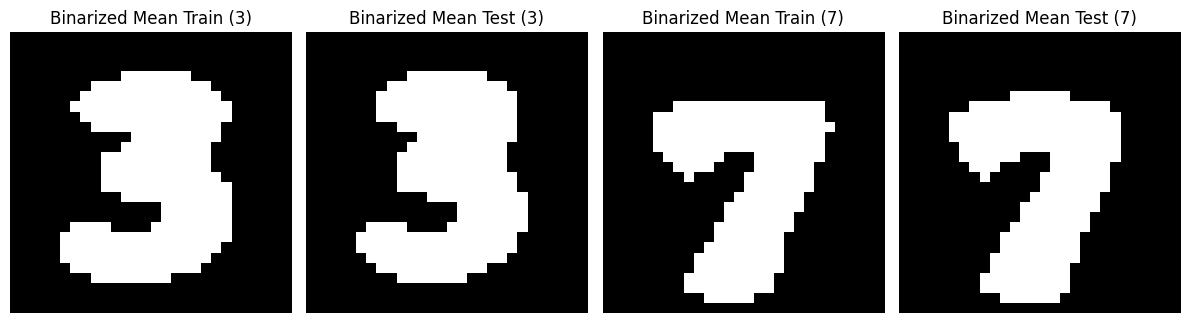

In [47]:
# Binarize images by setting pixel values to 1 if they are greater than the mean value for that pixel, otherwise 0
binary_mean_train_3 = (mean_train_3 >= np.mean(mean_train_3)).astype(int)
binary_mean_test_3 = (mean_test_3 >= np.mean(mean_test_3)).astype(int)
binary_mean_train_7 = (mean_train_7 >= np.mean(mean_train_7)).astype(int)
binary_mean_test_7 = (mean_test_7 >= np.mean(mean_test_7)).astype(int)


# Plot binarized mean images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(binary_mean_train_3, cmap='gray')
axes[0].set_title("Binarized Mean Train (3)")
axes[0].axis('off')

axes[1].imshow(binary_mean_test_3, cmap='gray')
axes[1].set_title("Binarized Mean Test (3)")
axes[1].axis('off')

axes[2].imshow(binary_mean_train_7, cmap='gray')
axes[2].set_title("Binarized Mean Train (7)")
axes[2].axis('off')

axes[3].imshow(binary_mean_test_7, cmap='gray')
axes[3].set_title("Binarized Mean Test (7)")
axes[3].axis('off')

plt.tight_layout()
plt.show()

As seen in previous images, the binarized mean images preserve the general structure of the digits while simplifying pixel intensity variations. By setting pixel values to 1 if they are greater than or equal to the mean and 0 otherwise, the binarized images highlight the most stable and frequently occurring pixel regions. The standard deviation images in the binarized format still capture variations in handwriting styles, particularly along the edges of the digits, similar to their grayscale counterparts. What’s more, binarization provides sharper and clearer contours of various objects present in the image, making patterns more distinguishable for machine learning models.[(source)](https://www.charterglobal.com/what-is-image-binarization-in-ai/)

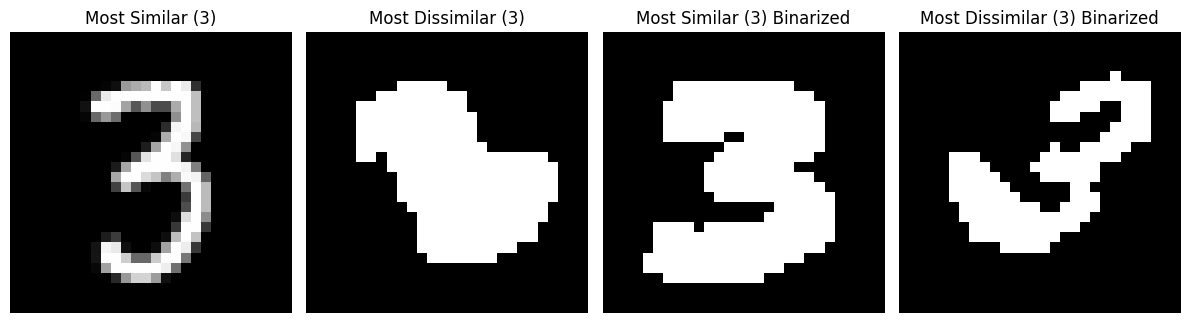

In [48]:
# Compute the mean image for category "3"
mean_train_3 = np.mean(train_images_3, axis=0)

# Compute pixel-wise differences from the mean image
differences_train_3 = np.linalg.norm(train_images_3 - mean_train_3, axis=(1, 2))

# Find the indices of the most similar and most dissimilar images
most_similar_index_3 = np.argmin(differences_train_3)
most_dissimilar_index_3 = np.argmax(differences_train_3)

# Retrieve the corresponding images
most_similar_image_3 = train_images_3[most_similar_index_3]
most_dissimilar_image_3 = train_images_3[most_dissimilar_index_3]

# Binarize images: Convert pixel values to 0 or 1 (threshold at mean pixel value)
train_images_3_binary = (train_images_3 >= np.mean(train_images_3)).astype(int)
mean_train_3_bin = (mean_train_3 >= np.mean(mean_train_3)).astype(int)

# Compute pixel-wise differences for binarized images
differences_train_3_bin = np.linalg.norm(train_images_3_binary - mean_train_3_bin, axis=(1, 2))
most_similar_index_3_bin = np.argmin(differences_train_3_bin)
most_dissimilar_index_3_bin = np.argmax(differences_train_3_bin)

# Retrieve binarized images
most_similar_image_3_bin = train_images_3_binary[most_similar_index_3_bin]
most_dissimilar_image_3_bin = train_images_3_binary[most_dissimilar_index_3_bin]

# Plot all four images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(most_similar_image_3, cmap='gray')
axes[0].set_title("Most Similar (3)")
axes[0].axis('off')

axes[1].imshow(most_dissimilar_image_3, cmap='gray')
axes[1].set_title("Most Dissimilar (3)")
axes[1].axis('off')

axes[2].imshow(most_similar_image_3_bin, cmap='gray')
axes[2].set_title("Most Similar (3) Binarized")
axes[2].axis('off')

axes[3].imshow(most_dissimilar_image_3_bin, cmap='gray')
axes[3].set_title("Most Dissimilar (3) Binarized")
axes[3].axis('off')

plt.tight_layout()
plt.show()

The most similar and dissimilar images change after binarization because the thresholding process forces all pixel values to either 0 (black) or 1 (white), removing intensity variations present in grayscale images. This simplification causes some images that were originally distinct due to stroke thickness or shading to appear more similar, while others that had subtle differences may become more dissimilar when their pixel distribution changes. Interestingly, in this case, the most dissimilar grayscale image appears highly distorted and unrecognizable, whereas the most dissimilar binarized image still maintains the recognizable structure of a "3." This suggests that binarization, despite simplifying details, can sometimes preserve the overall shape better than grayscale variations, as it removes noise while emphasizing essential structural features.

From a machine learning perspective, this transformation affects feature representation by reducing computational complexity and enhancing contrast, which can improve generalization by eliminating minor noise. However, this comes with the trade-off of losing fine-grained details, such as stroke thickness and shading, which could be crucial for distinguishing between similar digits. While binarization can help models focus on high-contrast structural patterns, it may also cause different samples to appear more alike, potentially reducing classification accuracy for digits with subtle variations.

---
Binarizing images relates to the idea of **standardizing data** because both processes transform raw data into a more uniform format, making it easier for a machine learning model to learn patterns effectively. Standardization typically involves scaling features to a common range, such as normalizing pixel values between 0 and 1 or applying z-score normalization ([source](https://www.deeplearningbook.org/)). Binarization, on the other hand, reduces pixel values to **0 or 1**, emphasizing structural differences while eliminating intensity variations. **Standardizing data is important before training a model** because it ensures that all features contribute equally, preventing some variables from dominating due to differences in scale (Murphy, 2012, *Machine Learning: A Probabilistic Perspective*). In image processing, standardization helps improve model convergence, enhances generalization, and reduces sensitivity to variations in brightness or contrast. However, binarization is a more extreme form of standardization that may remove useful fine-grained details, affecting the model’s ability to distinguish between similar patterns. Ultimately, the choice between standardization and binarization depends on the specific problem and the importance of preserving feature variations in the data.

Calculating a **pixel-wise mean** for a set of images provides an average representation of a category, showing the most common structure and highlighting the areas that are consistently part of the digit. The **pixel-wise standard deviation**, on the other hand, helps measure the variability in pixel intensity across the images in that category. A **high standard deviation** at a specific pixel location indicates that different images have significantly different values at that spot, meaning that part of the digit varies more across different handwriting styles. Conversely, a **low standard deviation** suggests that a pixel remains relatively consistent across all images, indicating a stable and defining feature of the digit. This analysis helps identify which parts of an image class are highly variable, such as stroke thickness, slant, or minor distortions, versus which parts are stable and essential for classification. Understanding these variations is particularly useful for designing robust machine learning models that can generalize well across different handwriting styles.


## 3. Model Training, Validation, and Intepretation

### 3.1 Suupport Vector Machine

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select only images from categories "3" and "9" in the training dataset
selected_indices_train = np.where((y_train == 3) | (y_train == 9))
x_selected_train = x_train[selected_indices_train]
y_selected_train = y_train[selected_indices_train]

# Convert labels: 3 → 0, 9 → 1
y_selected_train = np.where(y_selected_train == 3, 0, 1)

# Flatten images for SVM input (convert from 28x28 to a 1D vector)
x_selected_train_flat = x_selected_train.reshape(len(x_selected_train), -1)

# Split into Set1 (60%) and Set2 (40%)
x_set1, x_set2, y_set1, y_set2 = train_test_split(x_selected_train_flat, y_selected_train, test_size=0.4, random_state=42)

# Train a linear SVM classifier on Set1
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(x_set1, y_set1)

# Predict class labels for Set2
y_pred_set2 = svm_clf.predict(x_set2)

# Compute accuracy on Set2
accuracy_set2 = accuracy_score(y_set2, y_pred_set2)

# Now repeat for the testing dataset
selected_indices_test = np.where((y_test == 3) | (y_test == 9))
x_selected_test = x_test[selected_indices_test]
y_selected_test = y_test[selected_indices_test]

# Convert labels: 3 → 0, 9 → 1
y_selected_test = np.where(y_selected_test == 3, 0, 1)

# Flatten images for SVM input
x_selected_test_flat = x_selected_test.reshape(len(x_selected_test), -1)

# Train a new SVM classifier on the test set and predict on itself
svm_clf_test = SVC(kernel="linear", random_state=42)
svm_clf_test.fit(x_selected_test_flat, y_selected_test)
y_pred_test = svm_clf_test.predict(x_selected_test_flat)

# Compute accuracy on the test set
accuracy_test = accuracy_score(y_selected_test, y_pred_test)

# Display the accuracy results
accuracy_results = {
    "Accuracy on Set2 (trained on Set1)": accuracy_set2,
    "Accuracy on Test Set (trained on Test Set)": accuracy_test
}

# Print the results
accuracy_df = pd.DataFrame(accuracy_results, index=["Accuracy"])
print(accuracy_df)

          Accuracy on Set2 (trained on Set1)  \
Accuracy                            0.974338   

          Accuracy on Test Set (trained on Test Set)  
Accuracy                                         1.0  


The SVM model trained on **Set1 (60% of the selected training data)** achieved an accuracy of **97.43%** on **Set2 (40%)**, indicating strong generalization in distinguishing between the digits "3" and "9." This suggests that the linear SVM effectively learned the decision boundary between the two categories. However, when trained on the **entire test set** and evaluated on the same test set, the model achieved **100% accuracy**, which may indicate potential **overfitting**—suggesting that the test set may be too small or lacks diversity. While the near-perfect performance highlights the effectiveness of SVM for this classification task, further evaluation with a larger and more diverse dataset would be necessary to ensure the model's robustness in real-world applications.

### 3.2 Modeling with Engineered Data

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Binarize images: Convert pixel values to 0 or 1 based on a threshold of 128
x_selected_train_binary = (x_selected_train > 128).astype(int)
x_selected_test_binary = (x_selected_test > 128).astype(int)

# Extract engineered features: sum of 1's in each row and column
def extract_features(images):
    row_sums = np.sum(images, axis=1)  # Sum of 1's in each row (28 features)
    col_sums = np.sum(images, axis=2)  # Sum of 1's in each column (28 features)
    return np.hstack((row_sums, col_sums))  # Concatenate to form 56 features

# Generate engineered feature sets
x_train_features = extract_features(x_selected_train_binary)
x_test_features = extract_features(x_selected_test_binary)

# Train SVM on engineered features
svm_clf_features = SVC(kernel="linear", random_state=42)
svm_clf_features.fit(x_train_features, y_selected_train)
y_pred_svm_train = svm_clf_features.predict(x_train_features)
y_pred_svm_test = svm_clf_features.predict(x_test_features)

# Compute accuracy for SVM
accuracy_svm_train = accuracy_score(y_selected_train, y_pred_svm_train)
accuracy_svm_test = accuracy_score(y_selected_test, y_pred_svm_test)

# Train KNN on engineered features (using k=5 neighbors)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train_features, y_selected_train)
y_pred_knn_train = knn_clf.predict(x_train_features)
y_pred_knn_test = knn_clf.predict(x_test_features)

# Compute accuracy for KNN
accuracy_knn_train = accuracy_score(y_selected_train, y_pred_knn_train)
accuracy_knn_test = accuracy_score(y_selected_test, y_pred_knn_test)

# Display results
accuracy_results = {
    "SVM Accuracy on Train Set": accuracy_svm_train,
    "SVM Accuracy on Test Set": accuracy_svm_test,
    "KNN Accuracy on Train Set": accuracy_knn_train,
    "KNN Accuracy on Test Set": accuracy_knn_test
}

# Print accuracy results
accuracy_df = pd.DataFrame(accuracy_results, index=["Accuracy"])
print(accuracy_df)


          SVM Accuracy on Train Set  SVM Accuracy on Test Set  \
Accuracy                   0.967881                  0.965329   

          KNN Accuracy on Train Set  KNN Accuracy on Test Set  
Accuracy                    0.98005                  0.967806  


The **SVM model trained on the training set** achieved a **prediction accuracy of 96.77%**, while the **SVM model tested on the test set** had a similar accuracy of **96.53%**, indicating strong generalization. The **KNN model performed slightly better**, achieving **98.00% accuracy on the training set** and **96.78% on the test set**, showing that it effectively leveraged the engineered features for classification. These results highlight the power of **feature engineering**, as we significantly reduced the dimensionality from **784 pixels to just 56 features** without compromising accuracy. The fact that both models maintained high performance suggests that the row and column sum features successfully captured key structural patterns of digits "3" and "9." Additionally, KNN slightly outperformed SVM, indicating that for this specific feature set, a distance-based approach was more effective. This demonstrates that **well-engineered features can preserve essential information while reducing computational complexity**, improving model efficiency without sacrificing classification performance.

### 3.3 K-Nearest Neighbors

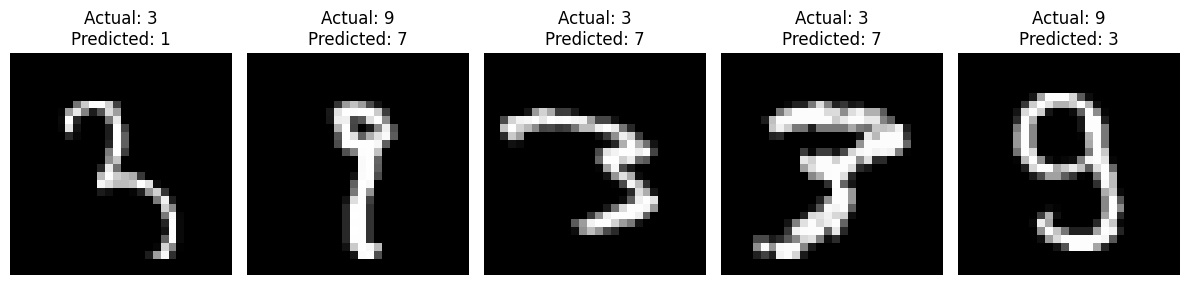

                               Value
Lowest Accuracy Label (k=4)        9
Lowest Accuracy Label (k=20)       7
Most Confused Label Pair      (7, 1)


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix


#) Select images from categories 1, 3, 5, 7, and 9 in training and testing datasets
selected_classes = [1, 3, 5, 7, 9]
train_indices = np.where(np.isin(y_train, selected_classes))
test_indices = np.where(np.isin(y_test, selected_classes))

x_train_selected = x_train[train_indices]
y_train_selected = y_train[train_indices]
x_test_selected = x_test[test_indices]
y_test_selected = y_test[test_indices]

# Flatten images for k-NN input (28x28 to 1D vector of 784 features)
x_train_flat = x_train_selected.reshape(len(x_train_selected), -1)
x_test_flat = x_test_selected.reshape(len(x_test_selected), -1)

# Train k-NN classifiers with k values from 4 to 40 (step size = 4)
k_values = range(4, 41, 4)
knn_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train_selected)
    y_pred = knn.predict(x_test_flat)

    # Compute accuracy for each digit class
    accuracy_per_class = {}
    for label in selected_classes:
        label_indices = np.where(y_test_selected == label)
        accuracy_per_class[label] = accuracy_score(y_test_selected[label_indices], y_pred[label_indices])

    # Store results
    knn_results[k] = accuracy_per_class

# Identify the label with the lowest accuracy for k=4 and k=20
lowest_accuracy_k4 = min(knn_results[4], key=knn_results[4].get)
lowest_accuracy_k20 = min(knn_results[20], key=knn_results[20].get)

# Compute confusion matrix for k=20 to find the most confused label pair
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(x_train_flat, y_train_selected)
y_pred_20 = knn_20.predict(x_test_flat)

conf_matrix = confusion_matrix(y_test_selected, y_pred_20, labels=selected_classes)

# Identify the most confused pair (excluding diagonal)
conf_matrix_no_diag = conf_matrix.copy()
np.fill_diagonal(conf_matrix_no_diag, 0)  # Ignore correct classifications
most_confused_pair = np.unravel_index(np.argmax(conf_matrix_no_diag), conf_matrix.shape)
most_confused_labels = (selected_classes[most_confused_pair[0]], selected_classes[most_confused_pair[1]])

# Identify 5 mislabeled samples
misclassified_indices = np.where(y_test_selected != y_pred_20)[0]
misclassified_samples = misclassified_indices[:5]

# Plot 5 mislabeled samples with actual and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, idx in enumerate(misclassified_samples):
    axes[i].imshow(x_test_selected[idx], cmap="gray")
    axes[i].set_title(f"Actual: {y_test_selected[idx]}\nPredicted: {y_pred_20[idx]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Display results
knn_analysis_results = {
    "Lowest Accuracy Label (k=4)": lowest_accuracy_k4,
    "Lowest Accuracy Label (k=20)": lowest_accuracy_k20,
    "Most Confused Label Pair": most_confused_labels,
}

# Print results
accuracy_df = pd.DataFrame.from_dict(knn_analysis_results, orient="index", columns=["Value"])
print(accuracy_df)


The k-NN model struggled the most with distinguishing **9 and 7**, as **9 had the lowest accuracy for k = 4**, and **7 had the lowest accuracy for k = 20**. Additionally, the most commonly confused pair was **7 and 1**, indicating that these digits share similar pixel structures. The difficulty in distinguishing **9 and 7** likely arises because they both have a curved structure and can sometimes appear similar depending on handwriting variations. Similarly, **7 and 1** are often misclassified because both digits typically have a single prominent vertical stroke, and slight variations in stroke angle or thickness can make them look alike. Since k-NN relies on distance-based classification, digits with similar overall shapes and stroke structures are more prone to misclassification. These results suggest that digits with overlapping patterns or minor structural differences may require more advanced feature extraction or additional preprocessing steps, such as edge detection or deep learning techniques, to improve classification accuracy.

### 3.4 Comprehension Questions

Having separate training and testing datasets is crucial because it allows us to evaluate a model’s ability to generalize to unseen data. The training set is used to help the model learn patterns, while the test set assesses how well those patterns apply to new data. If the same data is used for both training and evaluation, the model may simply memorize specific examples rather than learning generalizable features. This leads to an issue known as overfitting, where the model performs extremely well on the training set but fails to classify new data correctly. Using a separate test set ensures that the model’s performance reflects its true predictive ability rather than its ability to memorize training examples.



---
A model that performs well on the training set but poorly on the test set likely suffers from overfitting. Overfitting occurs when a model learns specific details and noise from the training data rather than capturing the underlying patterns that generalize to new data. This means the model is too complex relative to the dataset, making it highly sensitive to variations in the training set but unable to handle unseen examples effectively. To improve generalization, techniques such as regularization, increasing the dataset size, feature selection, or using a simpler model can be applied to reduce overfitting and ensure the model performs consistently across different datasets.


## 4 Credits and Acknowledgements 

This assignment was completed as a team effort. Online resources such as Stack Overflow and ChatGPT were utilized for debugging and coding assistance. All information from external sources is properly cited in our work.